In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
from sklearn.linear_model import LinearRegression

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(filepath, header=0)

<h2>1. Linear Regression and Multiple Linear Regression</h2>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>


 <b>Linear Function</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


In [4]:
# Create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [5]:
X = df[['highway-mpg']]
Y = df['price']

In [6]:
#Fit the linear model using highway-mpg:
lm.fit(X,Y)

LinearRegression()

In [7]:
# output a prediction:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [8]:
# Get intercept
lm.intercept_

38423.3058581574

In [9]:
# Get slope (coeffieience)
lm.coef_

array([-821.73337832])

<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>


In [30]:
# More Practice

lm1 = LinearRegression()

X1 = df[["engine-size"]]
Y1 = df[["price"]]
lm1.fit(X1, Y1)

print("Price = ", lm1.coef_[0,0] ,"* Engine size +", lm1.intercept_[0])

Price =  166.86001569141595 * Engine size + -7963.338906281042


<h2>Multiple Linear Regression</h2>

Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

$$
Y: Response \ Variable\\\\\\
X_1 :Predictor\ Variable \ 1\\\\
X_2: Predictor\ Variable \ 2\\\\
X_3: Predictor\ Variable \ 3\\\\
X_4: Predictor\ Variable \ 4\\\\
$$

$$
a: intercept\\\\\\
b_1 :coefficients \ of\ Variable \ 1\\\\
b_2: coefficients \ of\ Variable \ 2\\\\
b_3: coefficients \ of\ Variable \ 3\\\\
b_4: coefficients \ of\ Variable \ 4\\\\
$$


In [33]:
# develop a model using multiple variables as the predictor variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [32]:
lm.fit(Z, df['price'])

LinearRegression()

In [34]:
lm.intercept_

-15806.62462632922

In [35]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

<p> So: </p>
    
Price = -15678.742628061467 + 53.5 x horsepower + 4.7 x curb-weight + 81.530 x engine-size + 36.05 x highway-mpg

In [36]:
Z = df[["normalized-losses", "highway-mpg"]]
Y = df[["price"]]

lm2 = LinearRegression()
lm2.fit(Z,Y)

LinearRegression()

In [38]:
lm2.coef_

array([[   1.49789586, -820.45434016]])

In [41]:
print("price = ", lm2.intercept_[0], " + ", lm2.coef_[0,0], " * normalized-loss + ", 
     lm2.coef_[0,1], " * highway-mpg ")

price =  38201.31327245728  +  1.4978958634133346  * normalized-loss +  -820.4543401631864  * highway-mpg 


## Model Evaluation Using Visualization

<h3>Regression Plot</h3>

<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>Regression plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>

In [42]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0.0, 48173.77450568016)

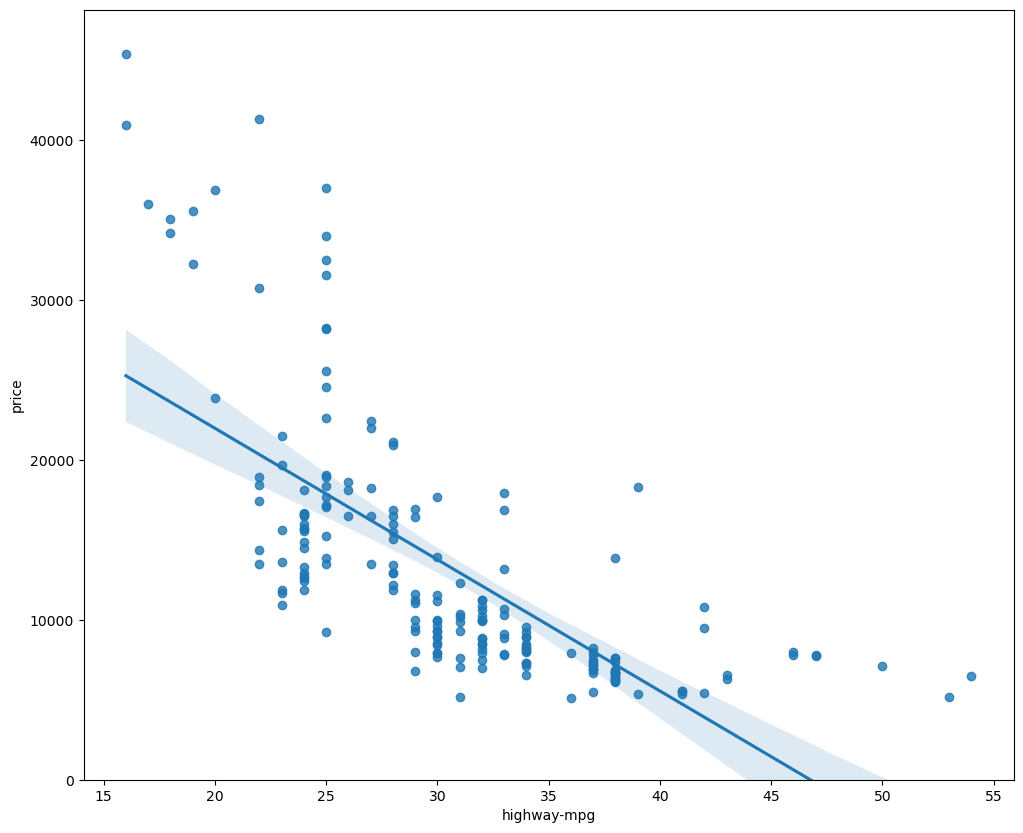

In [43]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".</p>

(0.0, 47414.1)

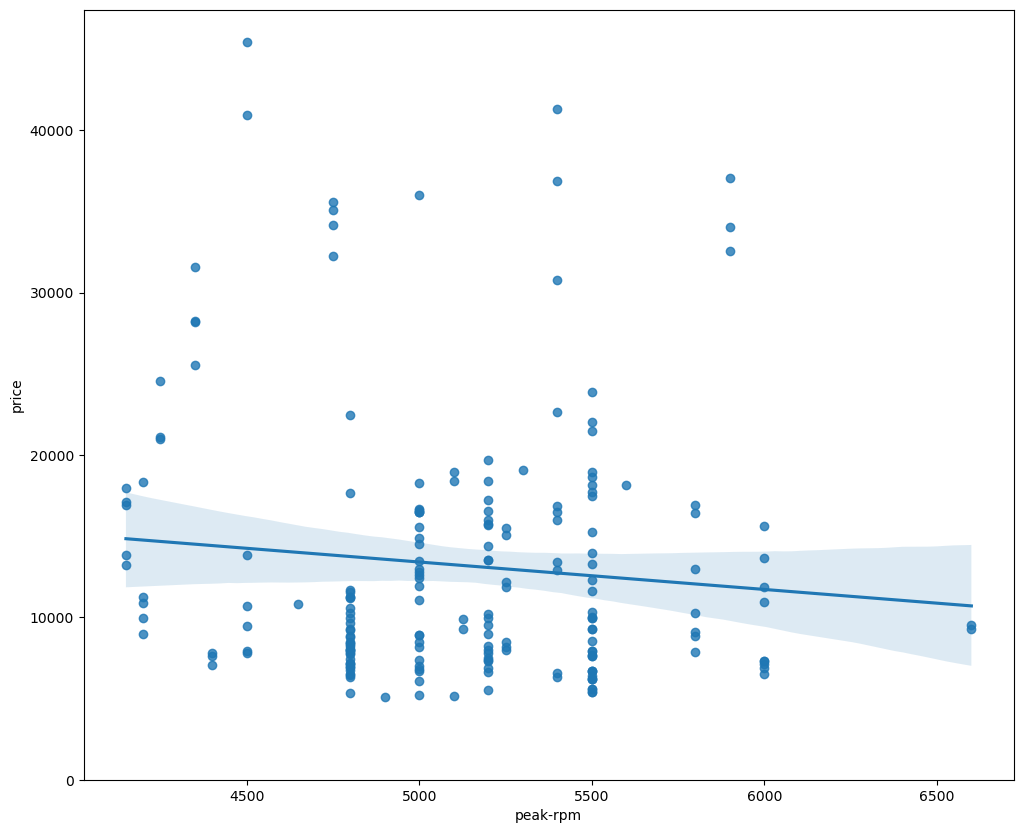

In [44]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [45]:
df[["highway-mpg", "peak-rpm", "price"]].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


## Residual Plot

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>Residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

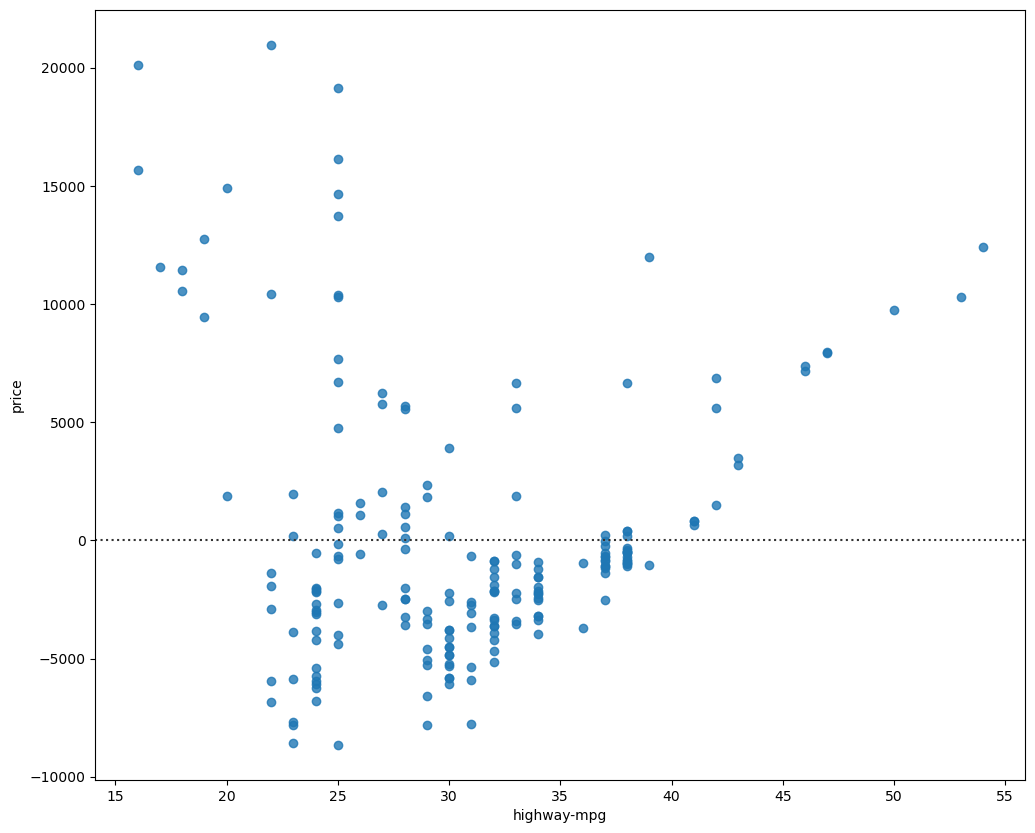

In [46]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>


## Multiple Linear Regression

How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the **distribution plot**. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [47]:
# develop a model using multiple variables as the predictor variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Y_hat = lm.predict(Z)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


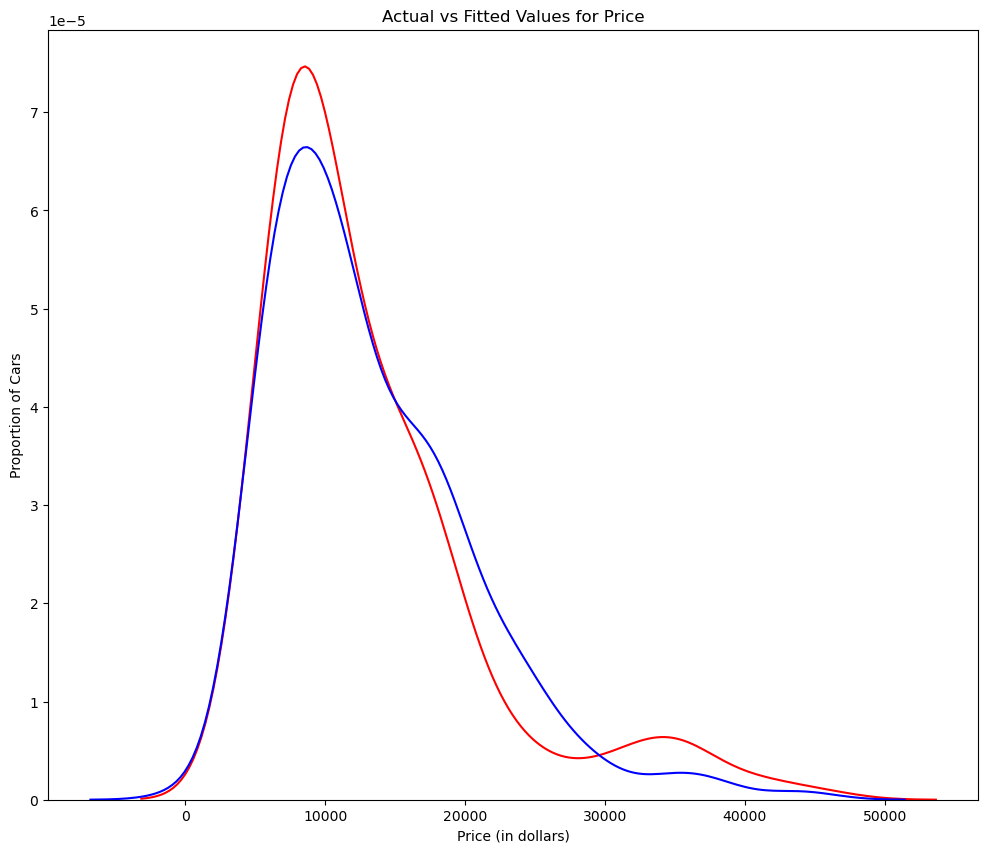

In [48]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## 3. Polynomial Regression and Pipelines

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>

<p> </p>

<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<p> </p>

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\
$$

<p> </p>

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


In [49]:
# Plotting function provided by course

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [50]:
x = df['highway-mpg']
y = df['price']

In [51]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


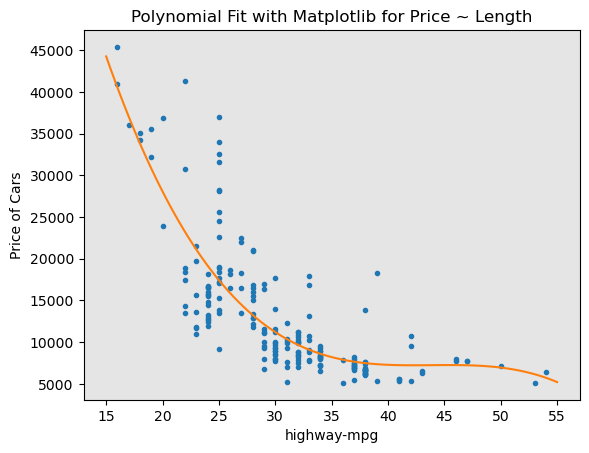

In [52]:
PlotPolly(p, x, y, 'highway-mpg')

In [53]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


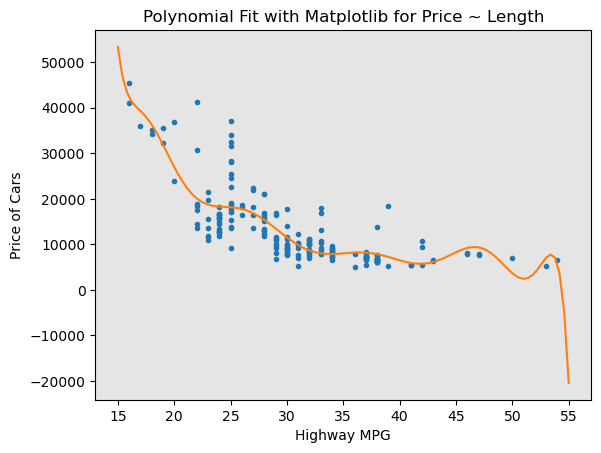

In [57]:
# Create 11 order polynomial model for highway mpg this time

f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


In [58]:
# We can perform a polynomial transform on multiple features. 
# First, we import the module:

from sklearn.preprocessing import PolynomialFeatures

In [59]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [60]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z_pr=pr.fit_transform(Z)

In [63]:
# In the original data, there are 201 samples and 4 features.
Z.shape

(201, 4)

In [64]:
# After the transformation, there are 201 samples and 15 features.
Z_pr.shape

(201, 15)

# Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [67]:
# Create the pipeline by creating a list of tuples including the name 
# of the model or estimator and its corresponding constructor.

Input=[('scale',StandardScaler()), 
       ('polynomial', PolynomialFeatures(include_bias=False)), 
       ('model',LinearRegression())]


In [68]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

- First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

- Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [69]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [70]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [79]:
# Practice
# Create a pipeline that standardizes the data, 
# then produce a prediction using a linear regression model 
# using the features Z and target y.

step = [("scale", StandardScaler()),
        ("model", LinearRegression())]

pipe = Pipeline(step)
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [80]:
ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# Measures for In-Sample Evaluation

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>


<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


In [90]:
# Caculate R^2

#highway_mpg_fit

X = df[['highway-mpg']]
Y = df['price']
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))


The R-square is:  0.4965911884339176


We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

In [91]:
# Caculate MSE
from sklearn.metrics import mean_squared_error

Yhat = lm.predict(X)

mse = mean_squared_error(df['price'], Yhat) 
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


## Caculate R^2 and MSE for Multiple Linear Regression

In [94]:
# R^2 for multiple linear regression
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


About 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [96]:
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


## Caculate R^2 and MSE for Polynomial Fit

In [97]:
from sklearn.metrics import r2_score

In [99]:
x = df['highway-mpg']
y = df['price']

f = np.polyfit(x, y, 3)
p = np.poly1d(f)

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], p(x)))

The R-square value is:  0.6741946663906514
The mean square error of price and predicted value using multifit is:  20474146.426361244


# Prediction and Decision Making

Prediction¶
In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

In [101]:
# Create new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


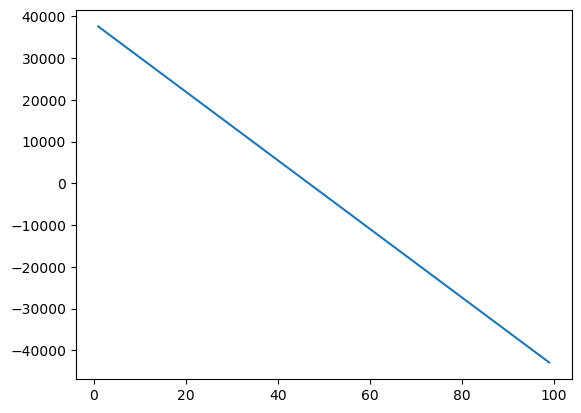

In [103]:
X = df[['highway-mpg']]
Y = df['price']

lm.fit(X, Y) # model

yhat=lm.predict(new_input) # product prediction

plt.plot(new_input, yhat) #plot prediction
plt.show()

## Determining a Good Model Fit

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
</p>
    
### What is a good R-squared value?


<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.</p>


### What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


### Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)

<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>
<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>
<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>
